In [58]:
library(base)
library(tidyverse)
library(lubridate)
library(ggplot2)
#install.packages('ggpubr')
#library(ggpubr)
#library(GoFKernel)
library(dplyr)
install.packages('scales')
library(scales) 

Warning message:
"package 'ggpubr' was built under R version 3.6.3"

ERROR: Error: package or namespace load failed for 'ggpubr' in loadNamespace(j <- i[[1L]], c(lib.loc, .libPaths()), versionCheck = vI[[j]]):
 there is no package called 'ggsignif'


Exercise 1 - Community Mobility Open Data

In [12]:
url <- "https://www.gstatic.com/covid19/mobility/Global_Mobility_Report.csv"
mobility_report <- read_csv(url)
head(mobility_report)
#it is also possible to consider the single Region mobility reports, 
#selecting a specific file from the folder containing all the data

Parsed with column specification:
cols(
  country_region_code = col_character(),
  country_region = col_character(),
  sub_region_1 = col_character(),
  sub_region_2 = col_logical(),
  metro_area = col_logical(),
  iso_3166_2_code = col_character(),
  census_fips_code = col_logical(),
  place_id = col_character(),
  date = col_date(format = ""),
  retail_and_recreation_percent_change_from_baseline = col_double(),
  grocery_and_pharmacy_percent_change_from_baseline = col_double(),
  parks_percent_change_from_baseline = col_double(),
  transit_stations_percent_change_from_baseline = col_double(),
  workplaces_percent_change_from_baseline = col_double(),
  residential_percent_change_from_baseline = col_double()
)
Warning message:
"10258622 parsing failures.
 row        col           expected                  actual                                                                  file
7212 metro_area 1/0/T/F/TRUE/FALSE Kabul Metropolitan Area 'https://www.gstatic.com/covid19/mobility/Globa

country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
AE,United Arab Emirates,NA,NA,NA,NA,NA,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-15,0,4,5,0,2,1
AE,United Arab Emirates,NA,NA,NA,NA,NA,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-16,1,4,4,1,2,1
AE,United Arab Emirates,NA,NA,NA,NA,NA,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-17,-1,1,5,1,2,1
AE,United Arab Emirates,NA,NA,NA,NA,NA,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-18,-2,1,5,0,2,1
AE,United Arab Emirates,NA,NA,NA,NA,NA,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-19,-2,0,4,-1,2,1
AE,United Arab Emirates,NA,NA,NA,NA,NA,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-20,-2,1,6,1,1,1


Select data related to one country

In [15]:
country <- function(x){
                    filter(mobility_report, country_region_code == x)
                    }
#select a couple of European countries
FR <- country('FR')       
DE <- country('DE')  

head(FR)
head(DE)

colnames <- colnames(mobility_report)    
colnames
paste0(colnames, collapse=",")

country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
FR,France,NA,NA,NA,NA,NA,ChIJMVd4MymgVA0R99lHx5Y__Ws,2020-02-15,-2,-1,23,12,-2,-1
FR,France,NA,NA,NA,NA,NA,ChIJMVd4MymgVA0R99lHx5Y__Ws,2020-02-16,6,2,9,7,-1,-1
FR,France,NA,NA,NA,NA,NA,ChIJMVd4MymgVA0R99lHx5Y__Ws,2020-02-17,1,2,16,-6,-15,4
FR,France,NA,NA,NA,NA,NA,ChIJMVd4MymgVA0R99lHx5Y__Ws,2020-02-18,5,2,36,-4,-14,3
FR,France,NA,NA,NA,NA,NA,ChIJMVd4MymgVA0R99lHx5Y__Ws,2020-02-19,-4,-3,18,-6,-12,2
FR,France,NA,NA,NA,NA,NA,ChIJMVd4MymgVA0R99lHx5Y__Ws,2020-02-20,-2,-1,29,-4,-15,3


country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
DE,Germany,NA,NA,NA,NA,NA,ChIJa76xwh5ymkcRW-WRjmtd6HU,2020-02-15,6,1,45,10,0,-1
DE,Germany,NA,NA,NA,NA,NA,ChIJa76xwh5ymkcRW-WRjmtd6HU,2020-02-16,7,10,9,6,-1,0
DE,Germany,NA,NA,NA,NA,NA,ChIJa76xwh5ymkcRW-WRjmtd6HU,2020-02-17,2,2,7,1,-2,0
DE,Germany,NA,NA,NA,NA,NA,ChIJa76xwh5ymkcRW-WRjmtd6HU,2020-02-18,2,2,10,1,-1,1
DE,Germany,NA,NA,NA,NA,NA,ChIJa76xwh5ymkcRW-WRjmtd6HU,2020-02-19,3,0,6,-1,-1,1
DE,Germany,NA,NA,NA,NA,NA,ChIJa76xwh5ymkcRW-WRjmtd6HU,2020-02-20,2,-1,14,3,-4,1


[1] "country_region_code"                               
 [2] "country_region"                                    
 [3] "sub_region_1"                                      
 [4] "sub_region_2"                                      
 [5] "metro_area"                                        
 [6] "iso_3166_2_code"                                   
 [7] "census_fips_code"                                  
 [8] "place_id"                                          
 [9] "date"                                              
[10] "retail_and_recreation_percent_change_from_baseline"
[11] "grocery_and_pharmacy_percent_change_from_baseline" 
[12] "parks_percent_change_from_baseline"                
[13] "transit_stations_percent_change_from_baseline"     
[14] "workplaces_percent_change_from_baseline"           
[15] "residential_percent_change_from_baseline"

[1] "country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline"

In [24]:
#Adds columns with week and month to dataframe
add_week_month <- function(df){
                df$week <- as.Date(cut(df$date, breaks = "week")) 
                df$month <- as.Date(cut(df$date, breaks = "month"))   
    return(df)
}
#average over each week
week_avg <- function(df){
              df %>% 
              arrange(date) %>% 
              group_by(week)%>%
              summarise_at(vars(               
                                          retail_and_recreation_percent_change_from_baseline,
                                          grocery_and_pharmacy_percent_change_from_baseline,
                                          parks_percent_change_from_baseline,
                                          transit_stations_percent_change_from_baseline,
                                          workplaces_percent_change_from_baseline,
                                          residential_percent_change_from_baseline), 
                                          funs(mean(., na.rm=TRUE)))
        }
#average over each month
month_avg <- function(df){
              df %>% 
              arrange(date) %>% 
              group_by(month)%>%
              summarise_at(vars(     
                                          retail_and_recreation_percent_change_from_baseline,
                                          grocery_and_pharmacy_percent_change_from_baseline,
                                          parks_percent_change_from_baseline,
                                          transit_stations_percent_change_from_baseline,
                                          workplaces_percent_change_from_baseline,
                                          residential_percent_change_from_baseline), 
                                          funs(mean(., na.rm=TRUE)))
        }

#france
week_FR <- FR %>% add_week_month %>% week_avg
month_FR <- FR %>% add_week_month %>% month_avg

#germany
week_DE <- DE %>% add_week_month %>% week_avg
month_DE <- DE %>% add_week_month %>% month_avg

head(week_FR)
head(month_FR)
head(week_DE)
head(month_DE)

week,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
2020-02-10,5.6909091,2.333333,22.9954545,24.9905660,-0.8318182,-0.7235023
2020-02-17,2.6545455,1.727154,27.2415584,11.5973510,-9.9844156,1.7428198
2020-02-24,-0.4818182,2.190601,9.8439532,2.1873351,-12.0636364,2.9556714
2020-03-02,-2.2259740,2.174935,0.4584416,-0.4848883,-4.2064935,2.1173403
2020-03-09,-10.3363636,6.431937,9.9428571,-4.1131579,-1.7415584,2.1331593
2020-03-16,-75.3485046,-33.358540,-48.5825748,-65.5179283,-55.6831169,23.7654155


month,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
2020-02-01,1.524242,1.735079,20.978169,8.949969,-10.49576,2.112667
2020-03-01,-44.221309,-20.371386,-26.918110,-38.624813,-33.30411,14.684886
2020-04-01,-81.337284,-42.967457,-56.516061,-76.864629,-61.22636,26.633531
2020-05-01,-51.154818,-16.733196,-4.598356,-53.200769,-38.55601,15.841902
2020-06-01,-15.215651,-1.089884,47.710158,-18.576380,-18.22576,6.490721
2020-07-01,3.123018,10.617430,158.372128,11.327800,-22.96100,3.615951


week,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
2020-02-10,4.852941,4.5882353,26.441176,6.8823529,-0.5294118,-0.6764706
2020-02-17,1.176471,0.9159664,5.697479,0.1260504,-4.1848739,0.9159664
2020-02-24,1.126050,4.9915966,10.260504,-1.3949580,-4.2773109,1.5462185
2020-03-02,2.243697,4.8571429,12.865546,-2.0336134,-0.5462185,0.9411765
2020-03-09,-6.806723,7.1176471,20.394958,-10.3613445,-3.0840336,2.4201681
2020-03-16,-40.420168,-3.4705882,14.411765,-43.8403361,-28.8403361,10.9831933


month,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
2020-02-01,1.141176,2.08235294,9.568627,-0.05098039,-4.113725,1.066667
2020-03-01,-26.846300,-3.23529412,13.159393,-28.84440228,-19.176471,7.823529
2020-04-01,-51.219608,-11.17716535,40.954902,-48.08823529,-38.011765,13.464706
2020-05-01,-30.406072,-3.88593156,59.065010,-31.81024668,-23.216319,8.330171
2020-06-01,-12.678431,0.02352941,99.543434,-20.04117647,-17.113725,4.950980
2020-07-01,-1.618596,4.88425047,131.044834,-13.40607211,-19.447818,3.388994


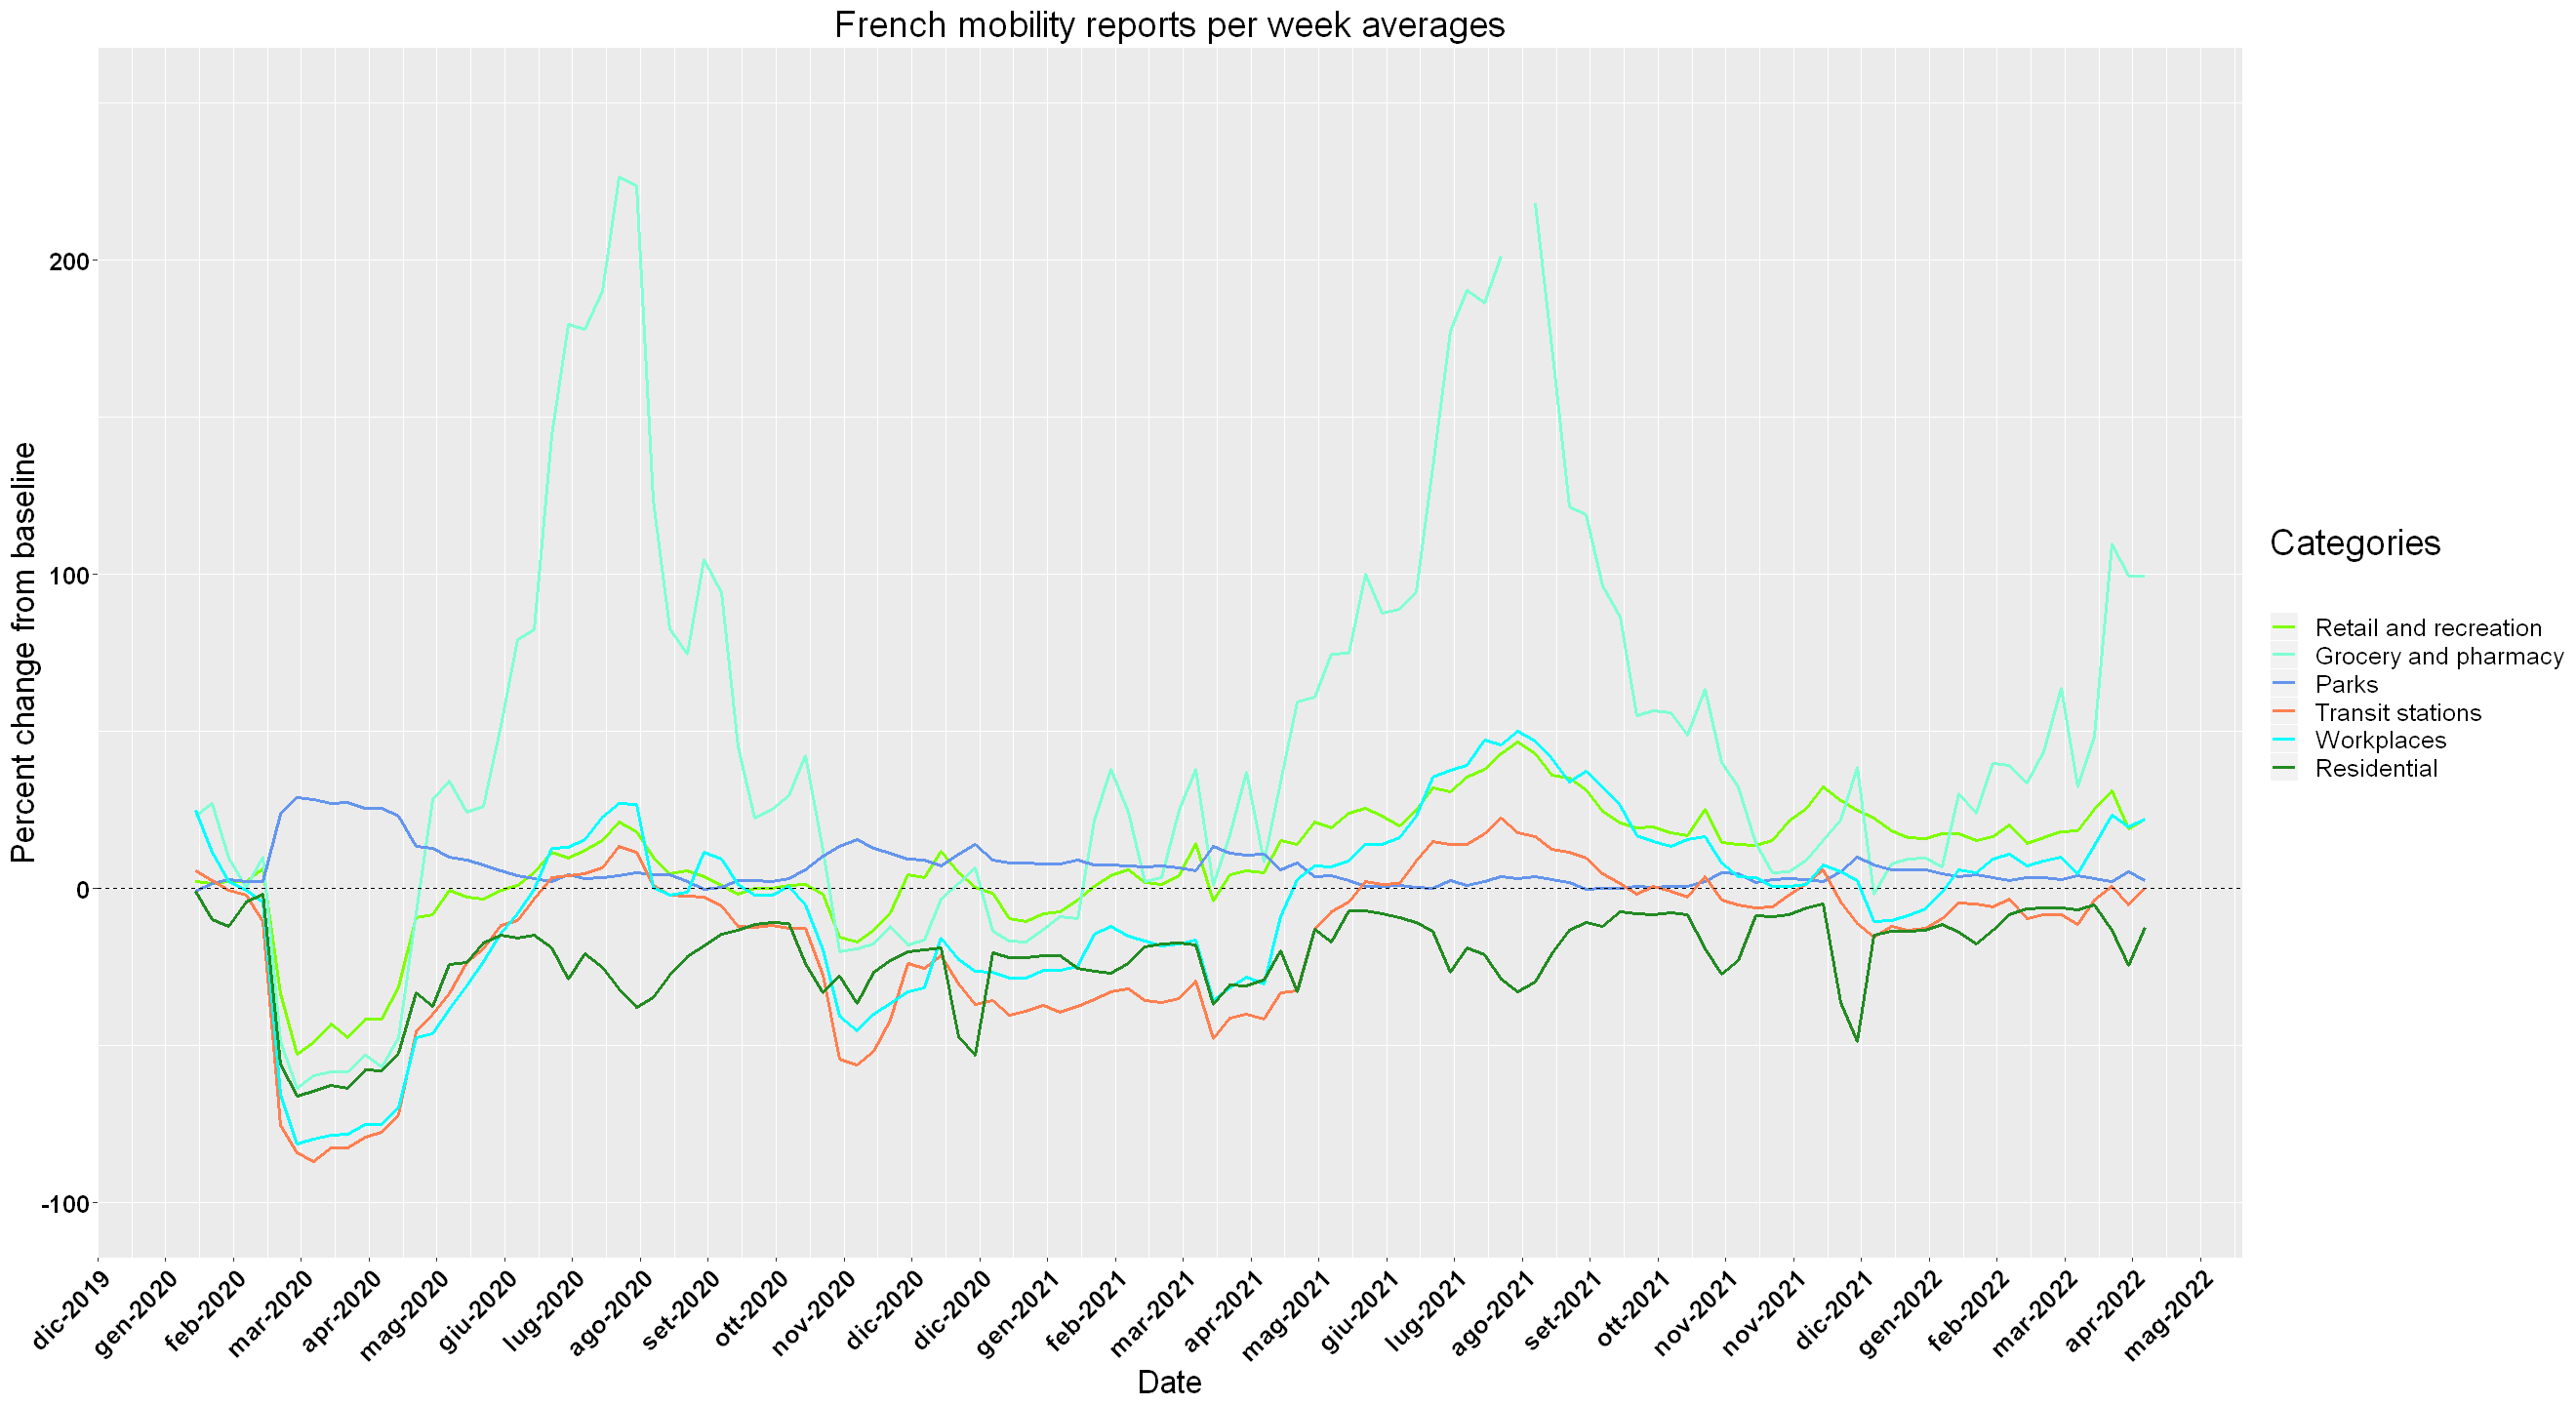

In [62]:
options(repr.plot.width=22, repr.plot.height=12)
#france weekly
fr_plt_week <-  week_FR %>% 
              gather(key, value, -week) %>% 
              ggplot(aes(week, value)) +  
              geom_line(aes(color = key), size = 1) +
              geom_hline(yintercept=0, linetype="dashed", color = "black")+
              labs(title = "French mobility reports per week averages",
                   x = "Date", y = "Percent change from baseline", color = "Categories \n") +
              scale_colour_manual(labels = c("Retail and recreation",
                                             "Grocery and pharmacy", 
                                             "Parks",
                                             "Transit stations",
                                             "Workplaces",
                                             "Residential" 
                                             ),
                                  values = c("chartreuse", "aquamarine", "cornflowerblue" , "coral" , "cyan" ,"forestgreen"))+
              scale_x_date(breaks = function(x) seq.Date(from = min(x), to = max(x), by = "4 weeks"), 
                         labels = date_format("%b-%Y"), 
                         minor_breaks = function(x) seq.Date(from = min(x), to = max(x), by = "2 weeks"))+
              ylim(-100,250)+
                 
              theme(axis.text.x = element_text(angle = 45, hjust = 1,colour = "black", size = rel(1.3)))+
              theme(axis.text.y = element_text(angle = 0, hjust = 1,colour = "black", size = 15))+
              theme(plot.title = element_text(hjust = 0.5, size = 22))+
              theme(axis.text=element_text(hjust = 0.5, size=12, face="bold"), axis.title=element_text(size=20))+
              theme(legend.title = element_text(size = 22),legend.text = element_text(size = 15))
                           
fr_plt_week

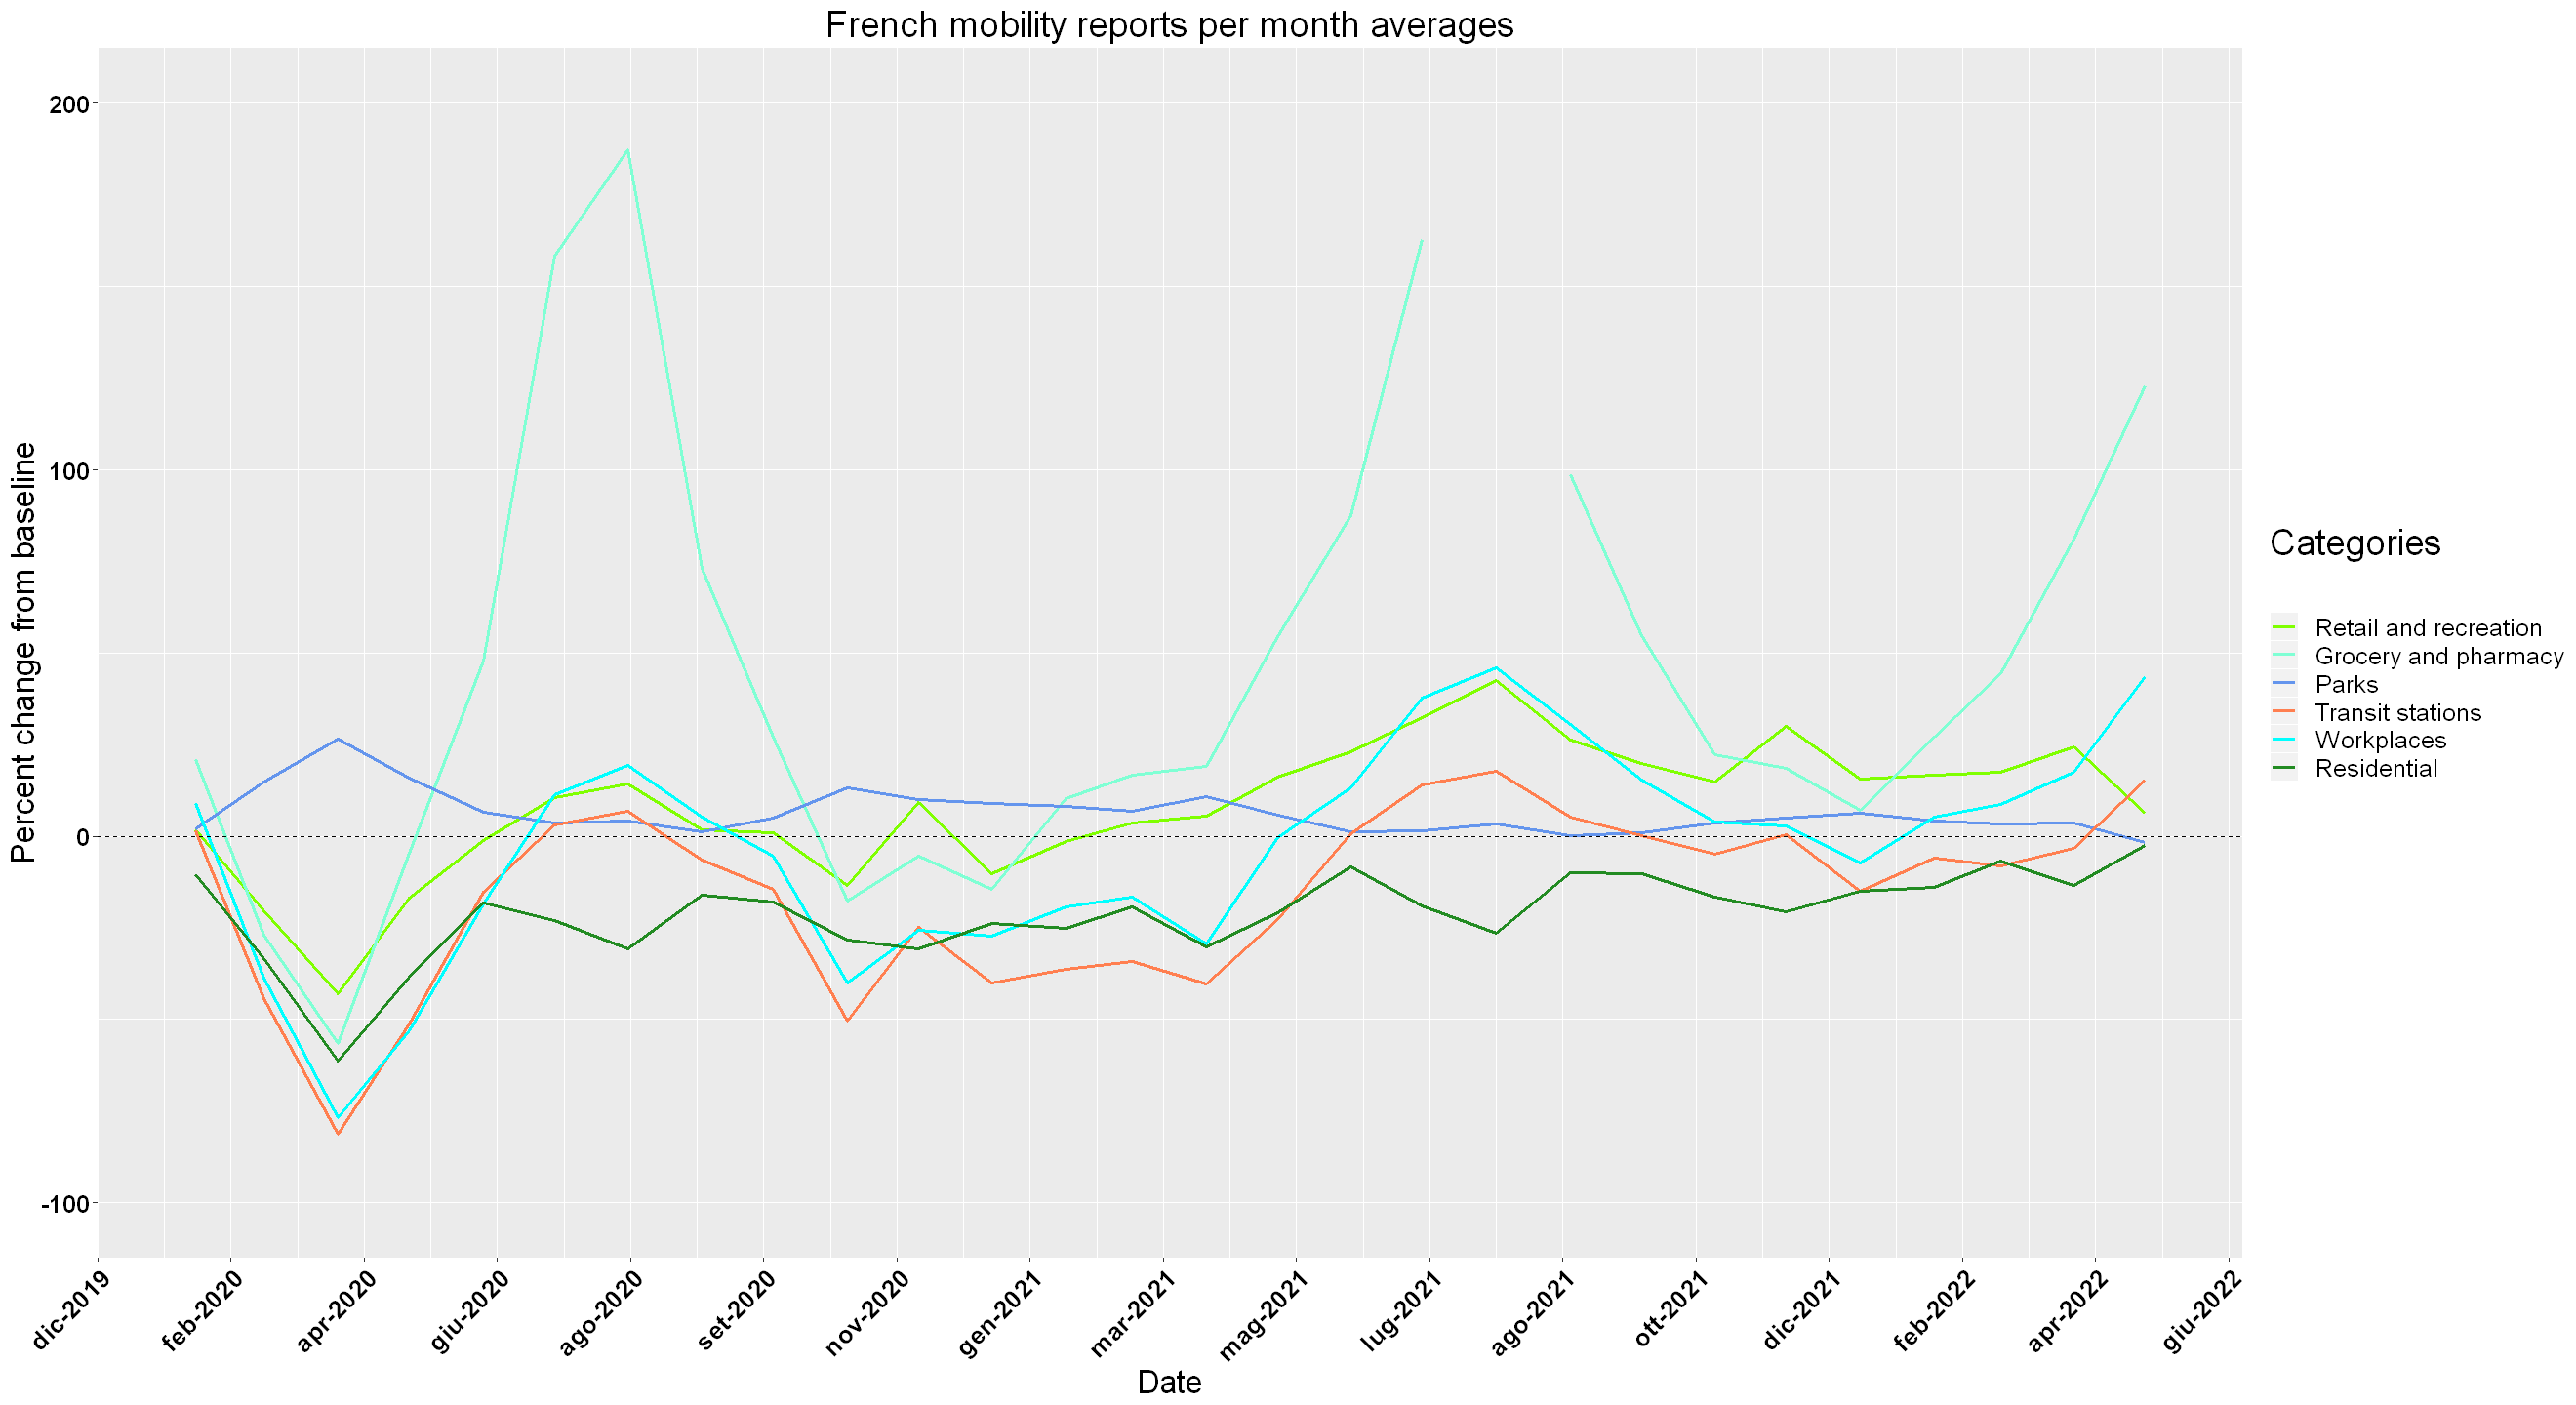

In [70]:
options(repr.plot.width=22, repr.plot.height=12)
#france monthly
fr_plt_month <-  month_FR %>% 
              gather(key, value, -month) %>% 
              ggplot(aes(month, value)) +  
              geom_line(aes(color = key), size = 1) +
              geom_hline(yintercept=0, linetype="dashed", color = "black")+
              labs(title = "French mobility reports per month averages",
                   x = "Date", y = "Percent change from baseline", color = "Categories \n") +
              scale_colour_manual(labels = c("Retail and recreation",
                                             "Grocery and pharmacy", 
                                             "Parks",
                                             "Transit stations",
                                             "Workplaces",
                                             "Residential" ),
                                  values = c("chartreuse", "aquamarine", "cornflowerblue" , "coral" , "cyan" ,"forestgreen"))+
              scale_x_date(breaks = function(x) seq.Date(from = min(x), to = max(x), by = "8 weeks"), 
                         labels = date_format("%b-%Y"), 
                         minor_breaks = function(x) seq.Date(from = min(x), to = max(x), by = "4 weeks"))+
              ylim(-100,200)+                           
              theme(axis.text.x = element_text(angle = 45, hjust = 1,colour = "black", size = rel(1.3)))+
              theme(axis.text.y = element_text(angle = 0, hjust = 1,colour = "black", size = 15))+
              theme(plot.title = element_text(hjust = 0.5, size = 22))+
              theme(axis.text=element_text(hjust = 0.5, size=12, face="bold"), axis.title=element_text(size=20))+
              theme(legend.title = element_text(size = 22),legend.text = element_text(size = 15))
fr_plt_month

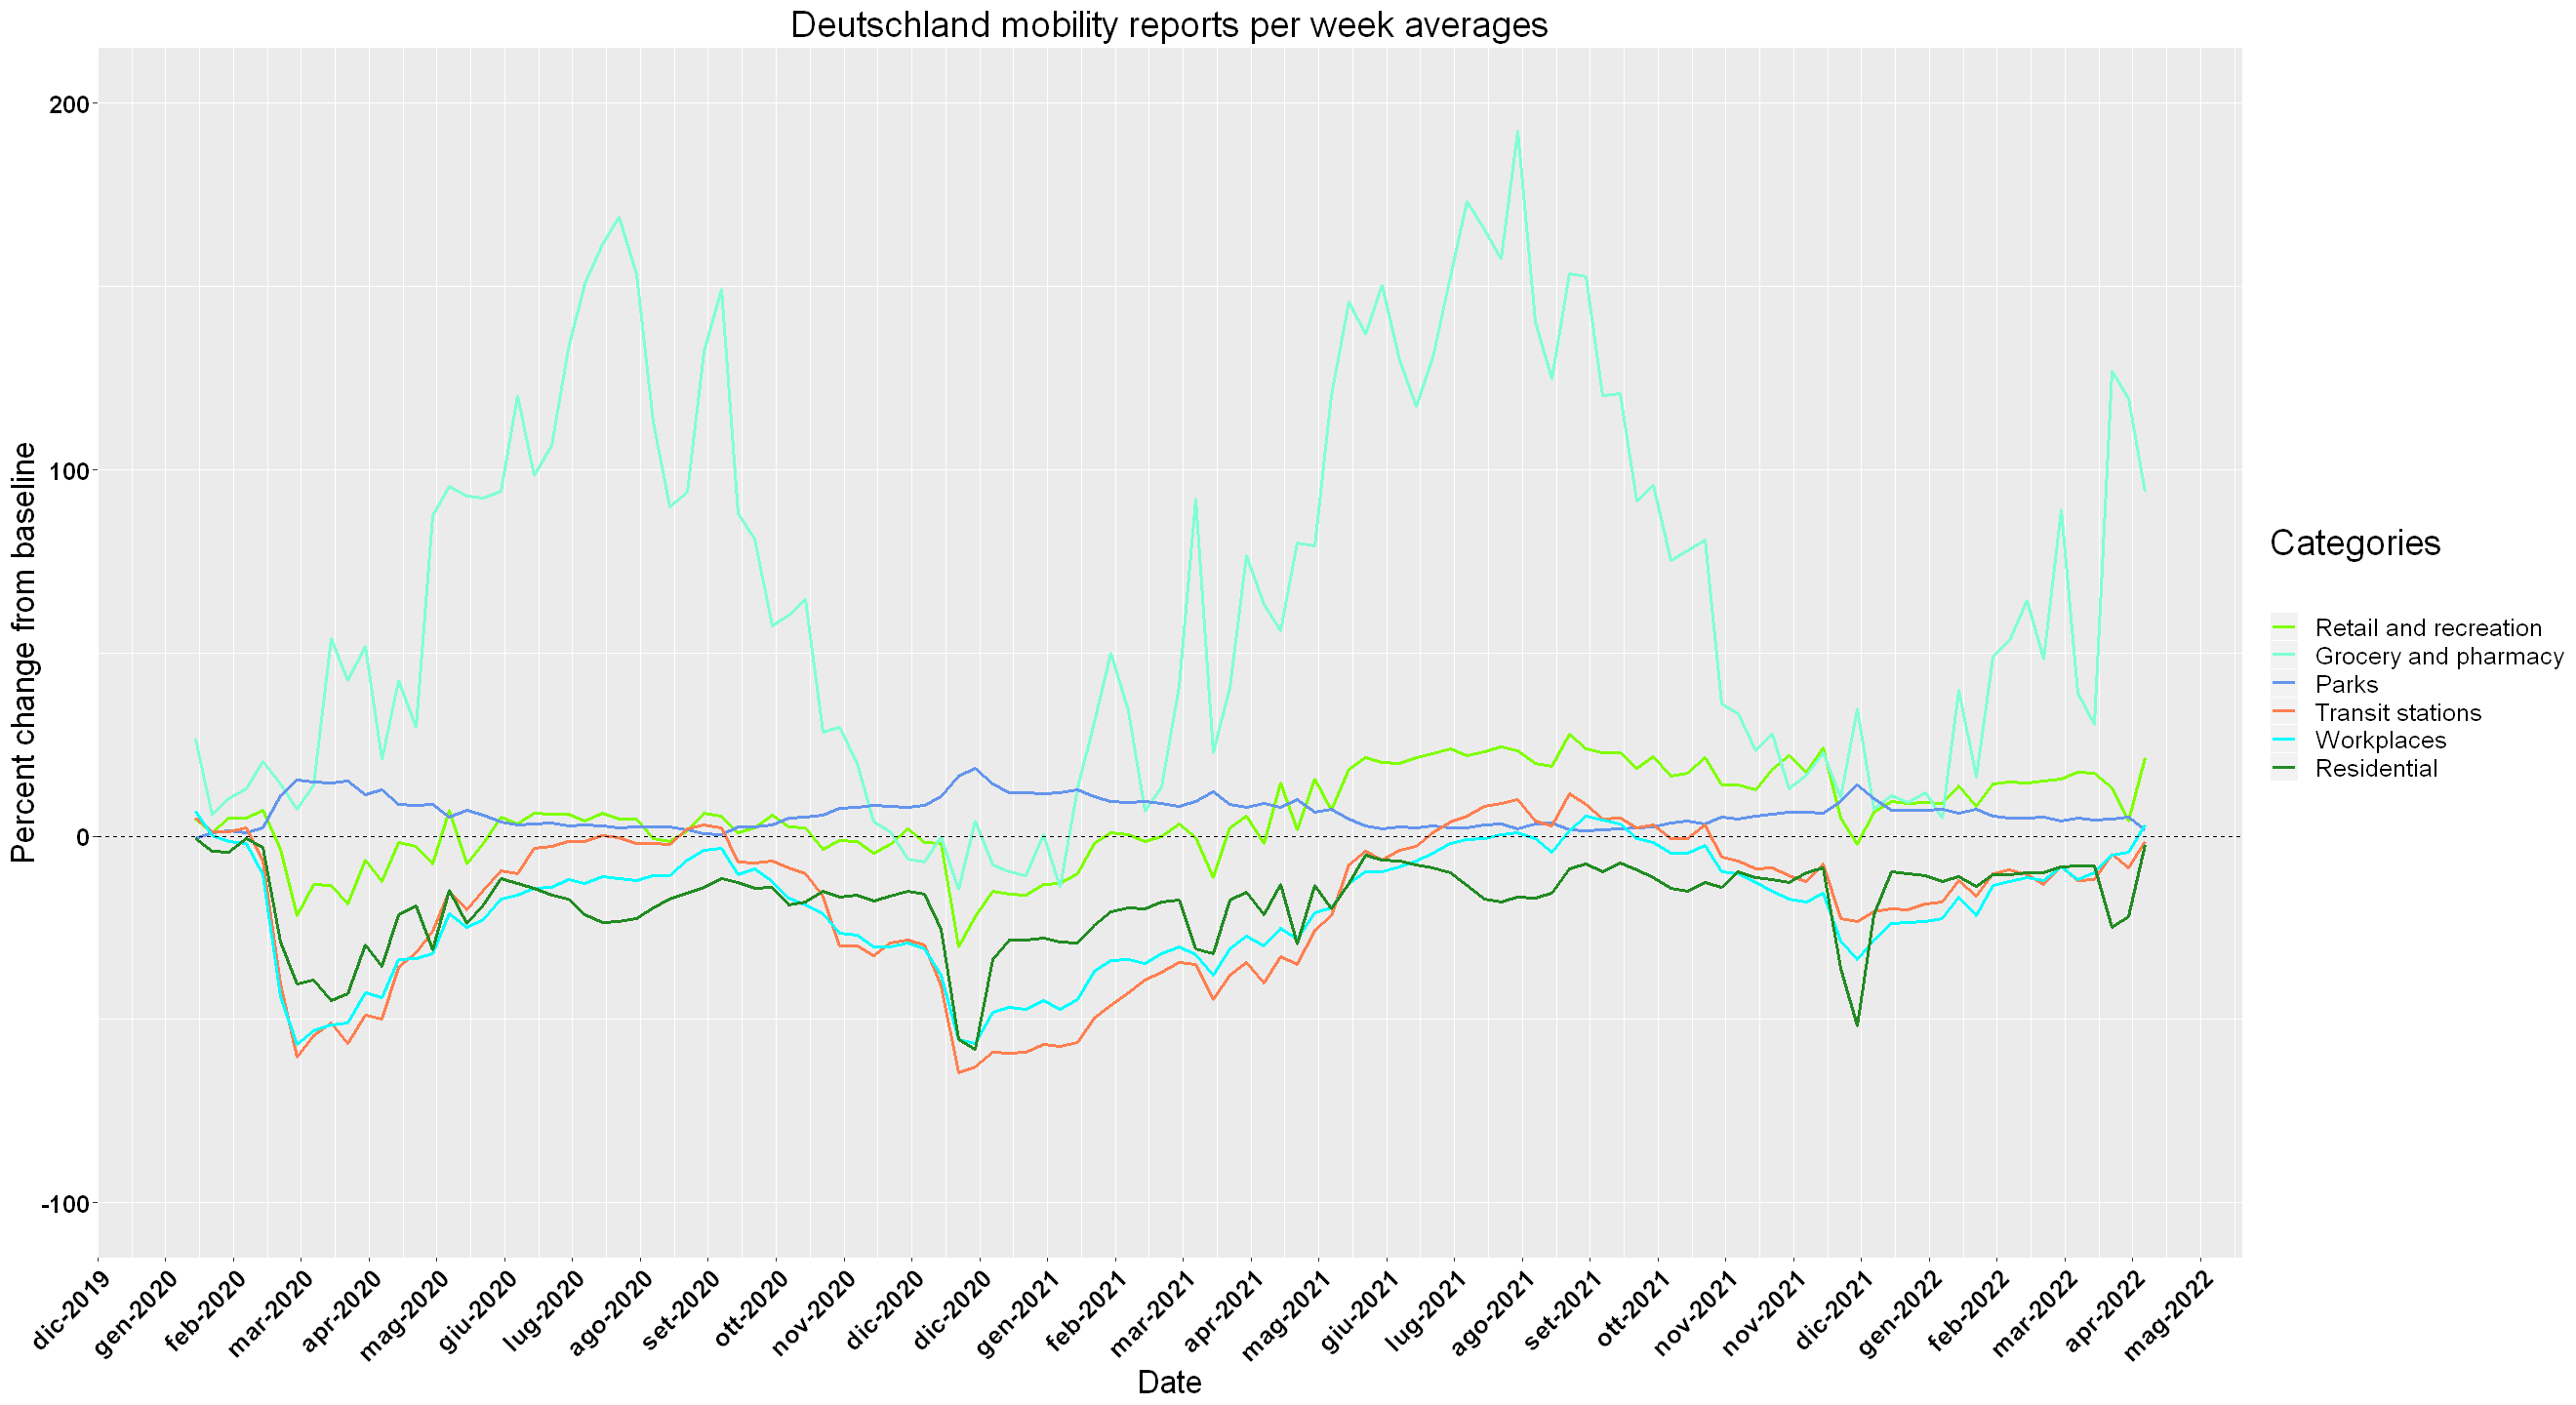

In [71]:
#germany weekly
de_plt_week <-  week_DE %>% 
              gather(key, value, -week) %>% 
              ggplot(aes(week, value)) +  
              geom_line(aes(color = key), size = 1) +
              geom_hline(yintercept=0, linetype="dashed", color = "black")+
              labs(title = "Deutschland mobility reports per week averages",
                   x = "Date", y = "Percent change from baseline", color = "Categories \n") +
              scale_colour_manual(labels = c("Retail and recreation",
                                             "Grocery and pharmacy", 
                                             "Parks",
                                             "Transit stations",
                                             "Workplaces",
                                             "Residential" ),
                                 values = c("chartreuse", "aquamarine", "cornflowerblue" , "coral" , "cyan" ,"forestgreen"))+
              scale_x_date(breaks = function(x) seq.Date(from = min(x), to = max(x), by = "4 weeks"), 
                         labels = date_format("%b-%Y"),
                         minor_breaks = function(x) seq.Date(from = min(x), to = max(x), by = "2 weeks"))+
              ylim(-100,200)+                           
              theme(axis.text.x = element_text(angle = 45, hjust = 1,colour = "black", size = rel(1.3)))+
              theme(axis.text.y = element_text(angle = 0, hjust = 1,colour = "black", size = 15))+
              theme(plot.title = element_text(hjust = 0.5, size = 22))+
              theme(axis.text=element_text(hjust = 0.5, size=12, face="bold"), axis.title=element_text(size=20))+
              theme(legend.title = element_text(size = 22),legend.text = element_text(size = 15))
de_plt_week

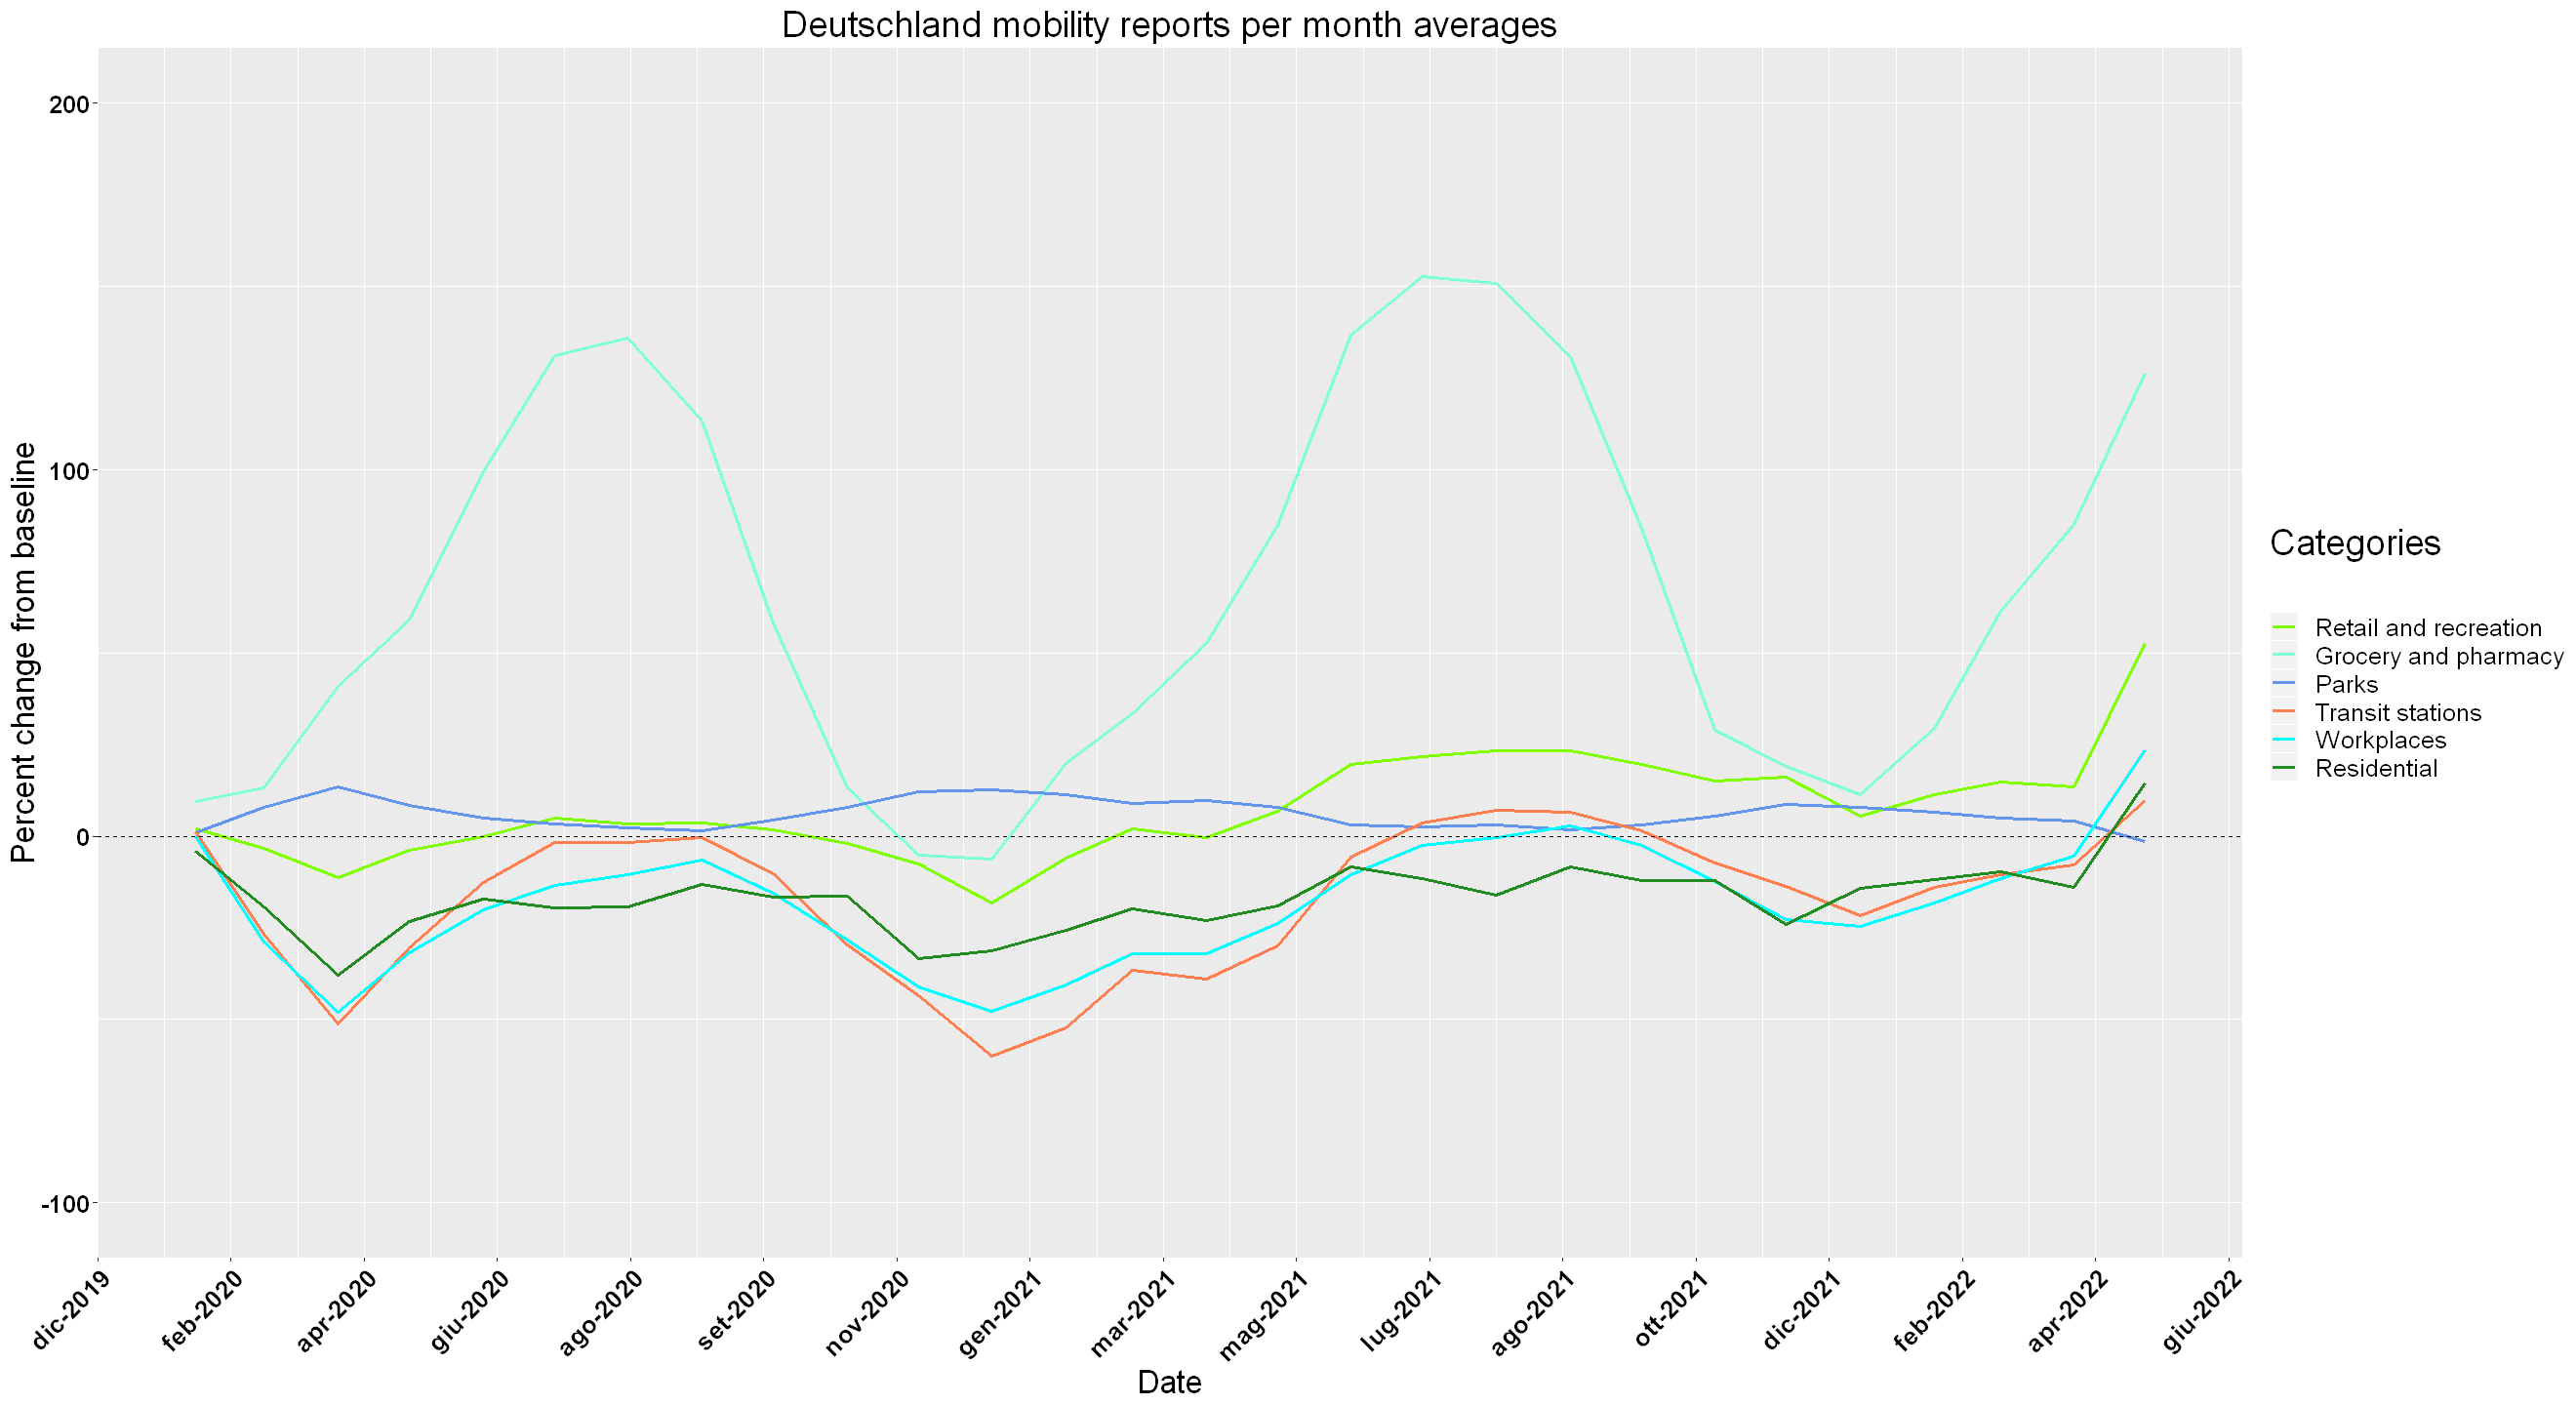

In [72]:
#germany monthly
de_plt_monthly <-  month_DE %>% 
              gather(key, value, -month) %>% 
              ggplot(aes(month, value)) +  
              geom_line(aes(color = key), size = 1) +
              geom_hline(yintercept=0, linetype="dashed", color = "black")+
              labs(title = "Deutschland mobility reports per month averages",
                   x = "Date", y = "Percent change from baseline", color = "Categories \n") +
              scale_colour_manual(labels = c("Retail and recreation",
                                             "Grocery and pharmacy", 
                                             "Parks",
                                             "Transit stations",
                                             "Workplaces",
                                             "Residential" ),
                                  values = c("chartreuse", "aquamarine", "cornflowerblue" , "coral" , "cyan" ,"forestgreen"))+
              scale_x_date(breaks = function(x) seq.Date(from = min(x), to = max(x), by = "8 weeks"),  
                        labels = date_format("%b-%Y"),
                         minor_breaks = function(x) seq.Date(from = min(x), to = max(x), by = "4 weeks"))+
              ylim(-100,200)+                           
              theme(axis.text.x = element_text(angle = 45, hjust = 1,colour = "black", size = rel(1.3)))+
              theme(axis.text.y = element_text(angle = 0, hjust = 1,colour = "black", size = 15))+
              theme(plot.title = element_text(hjust = 0.5, size = 22))+
              theme(axis.text=element_text(hjust = 0.5, size=12, face="bold"), axis.title=element_text(size=20))+
              theme(legend.title = element_text(size = 22),legend.text = element_text(size = 15))
de_plt_monthly

Exercise 2 - Random number generators

In [120]:
middle_square <- function(n, seed){ 
    x <- NULL
    for (i in 1:n){
        x.squared <- format(seed^2)                           
        number <- unlist(strsplit(as.character(x.squared),"")) #convert seed to char list   
        len <- length(unlist(strsplit(as.character(seed),"")))
        ifelse( (length(number)<2*len),
                num <- c(rep(0,2*len - length(number)), number),
                num <-  number
               )                                               #add 0 at the begininning 
                                                               #if number of digit different from 2*len
        trimming <- number[(len/2):(3*len/2)]
        convert <- as.numeric(paste(trimming, collapse=""))
        x <- c(x, convert)
        seed <- convert
        }
        return(x)
        #return(sort(x))
    }

In [121]:
middle_square(100,12345) #limitations over n iterations

[1]  523990 4565520   84397  122853  928596 2290531  246532 7780270   53260
 [10]  836627 9944737  889779 1706668  912716 3050496  305526 3461366  198105
 [19] 2455910   31494  918720 4046438  637366 6235417  888043 8620369  431076
 [28] 5826517  394830 5890728  470068  963924 9149477  371293 7858491  175588
 [37] 8311457  908032 4522113   44951   20592  240304 7460124  565345   19615
 [46]  847482 8225740  766280   87185  601224 1470298  161776 1714741  940337
 [55] 4233673  792399 7896175  234958 2052617  213237 4700181  209170 7520889
 [64]  656377  830766  172146 6342453   22671  139742 5278265  786008 7808576
 [73]   97386  484032   34287  175598 8346576  966533   34186  168682 4536171
 [82]   57685  327559 7294898  321554    3397   15396  370368 7172455  144411
 [91] 8545369  302333 4052428  642217 2442675  966661 4433488  965582 2348598
[100]  515913

Exercise 3 - Bayesian Inference I

All interviews are independent and the probability $p$ that people have read the last issues of the journal.
The appropriate probability distribution for $y$, the number of people who have read the journal among the $n = 150$ people interviewed is the binomial distribution:

$$
P(y|p,n,M) = {n\choose y} p^y(1-p)^{n-y} = {150\choose 29} p^{29}(1-p)^{121} \qquad \text{with} \qquad y\leq n
$$
(sample from random sample of people, every person in the sample got equal probability of being selected)

Assume a uniform Prior $P(p|M) \sim \mathcal{U}(0,1)$the posterior is simply proportional to the likelyhood with normalization factor $Z$:

$$P(p|y,n,M) = \frac{1}{Z} p^y(1-p)^{n-y} = \frac{1}{Z} P^*(p|y,n,M) $$

with $Z$ as normalization factor.

The Posterior is a re-normalized binomial distribution.

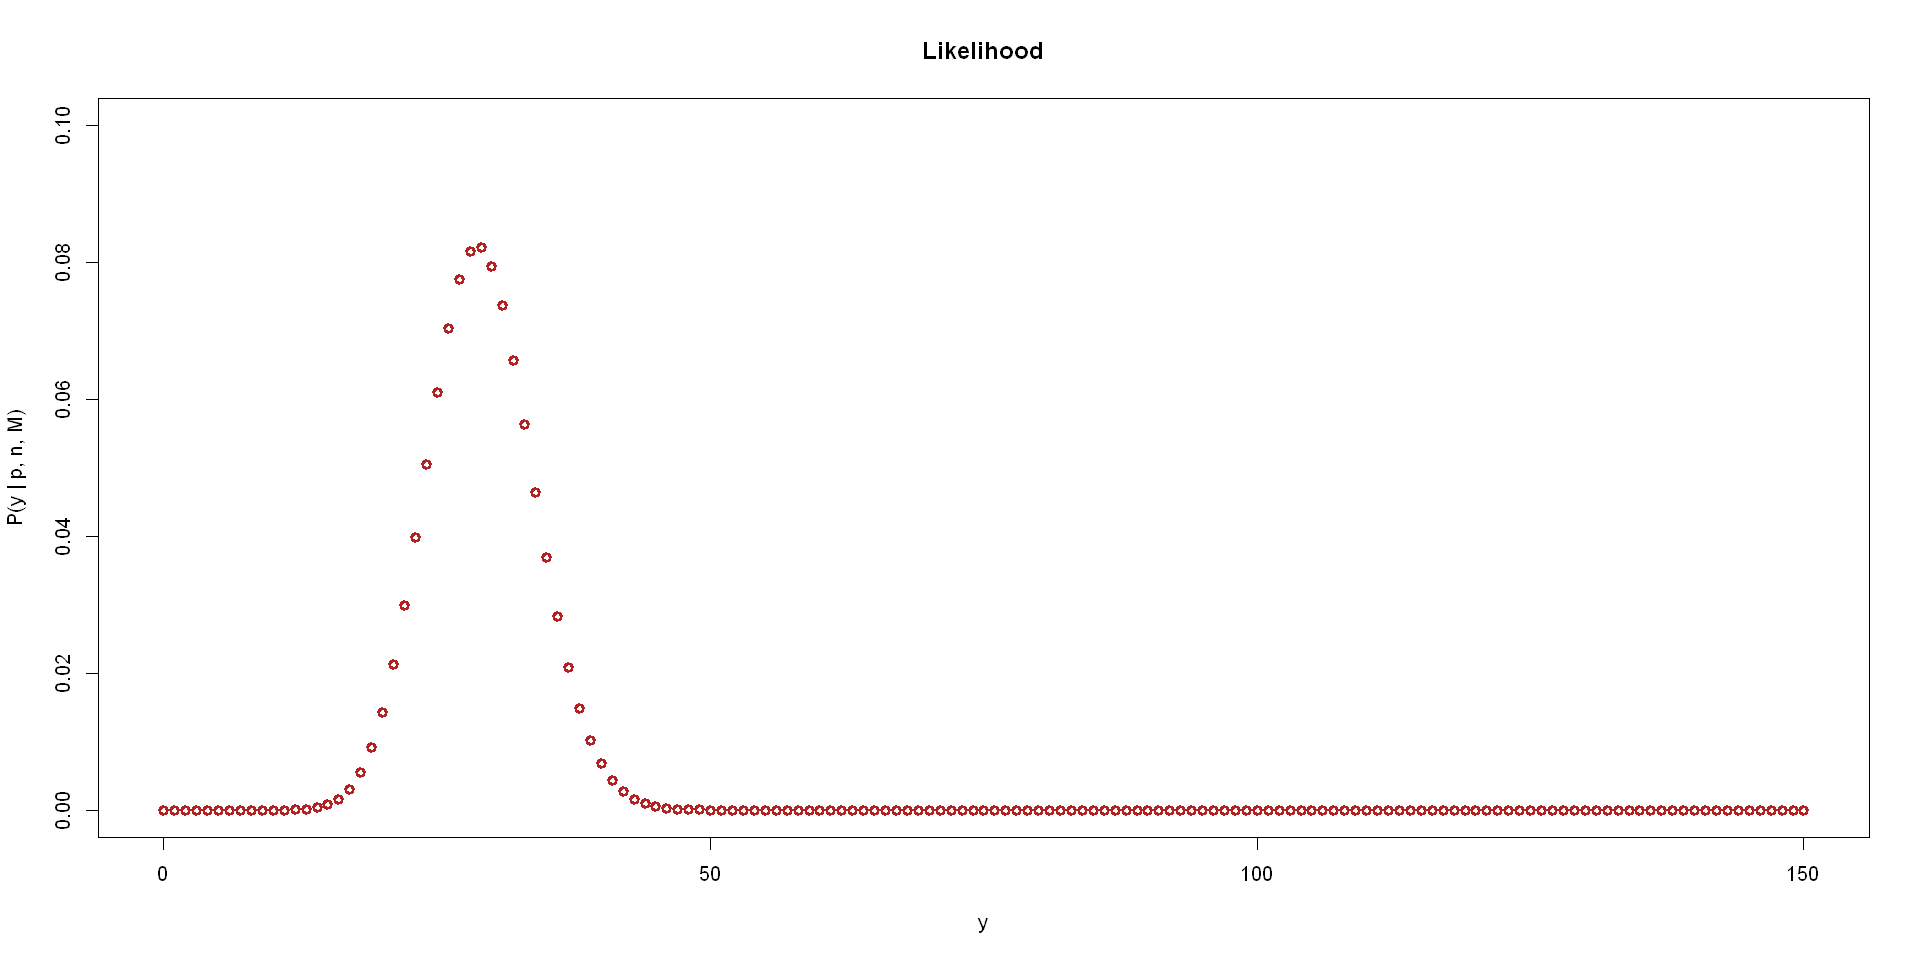

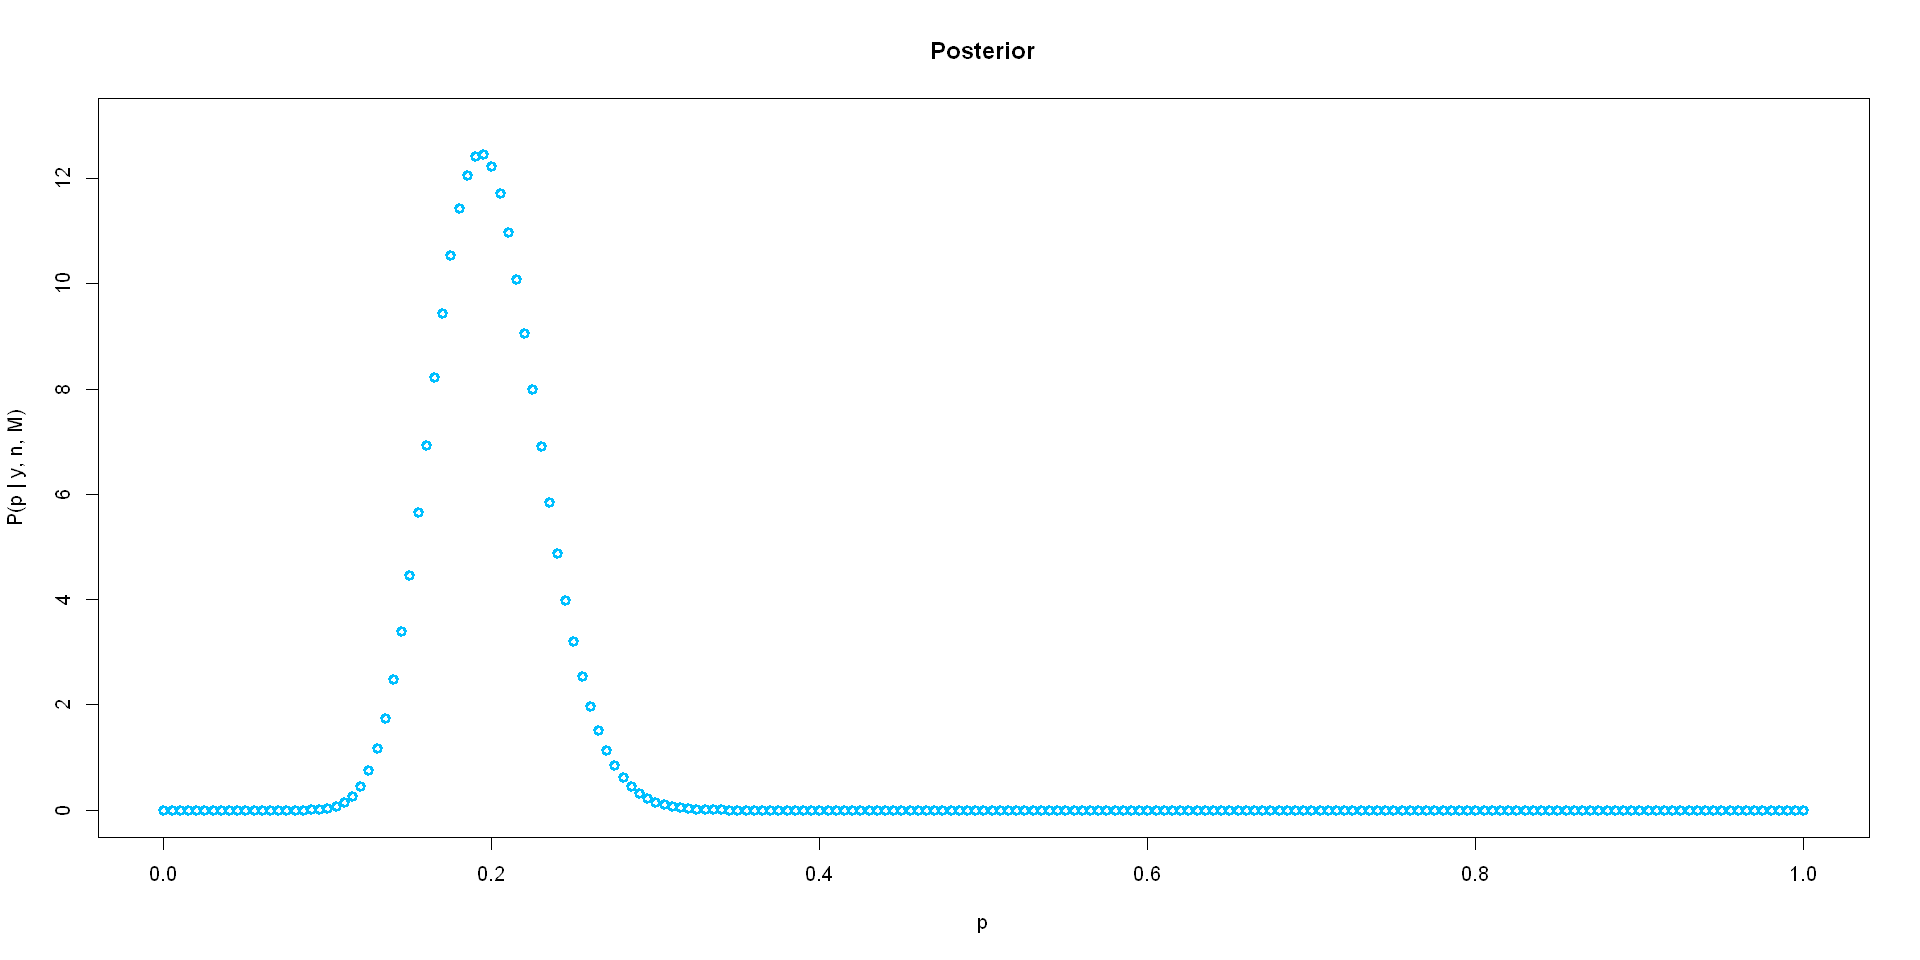

In [136]:
n    <- 150
succ <- 29
p    <- succ/n
x    <- seq(0,150)
prob <- seq(0, 1, length.out = 201)

likelihood <- dbinom(x, n, p)              #likelihood
post_un <- dbinom(succ, n, probs)          #unnormalized posterior
post <- 201*post_nn/sum(post_nn)           #posterior normalized

options(repr.plot.width=16, repr.plot.height=8)
plot(x, likelihood, lwd = 3,
     xlim=c(0,150), ylim=c(0,0.1), col = 'firebrick',
     main="Likelihood", 
     xlab="y", ylab="P(y | p, n, M)"
    )
plot(prob, post, lwd = 3,
     xlim=c(0,1), ylim=c(0,13), col = 'deepskyblue',
     main="Posterior",
     xlab="p", ylab="P(p | y, n, M)", 
     )

Exercise 4 - Bayesian Inference II

For the Beta prior,it is assumed $\alpha=\beta=10$ to have a simmetric distribution, since the coin is assumed to be balanced.

The Likelihood is a binomial distribution with $n=30$ and $p=1/2$.

The Posterior will be a renormalized binomial distribution for a uniform prior, while Beta distribution got $\alpha_p=\alpha + r$ and $\beta_p= \beta + n - r$.

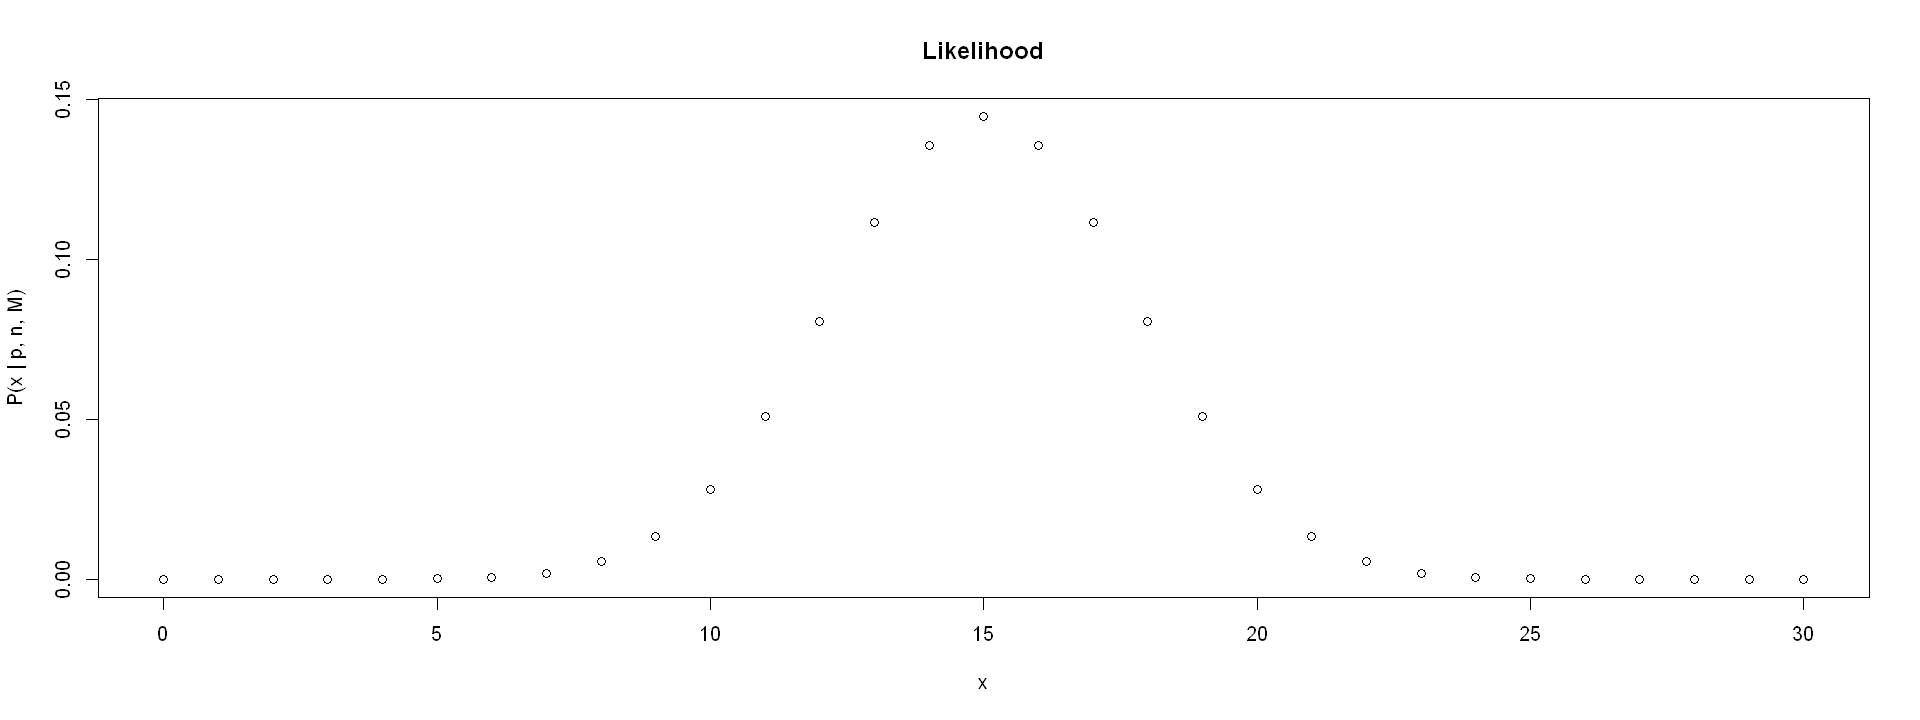

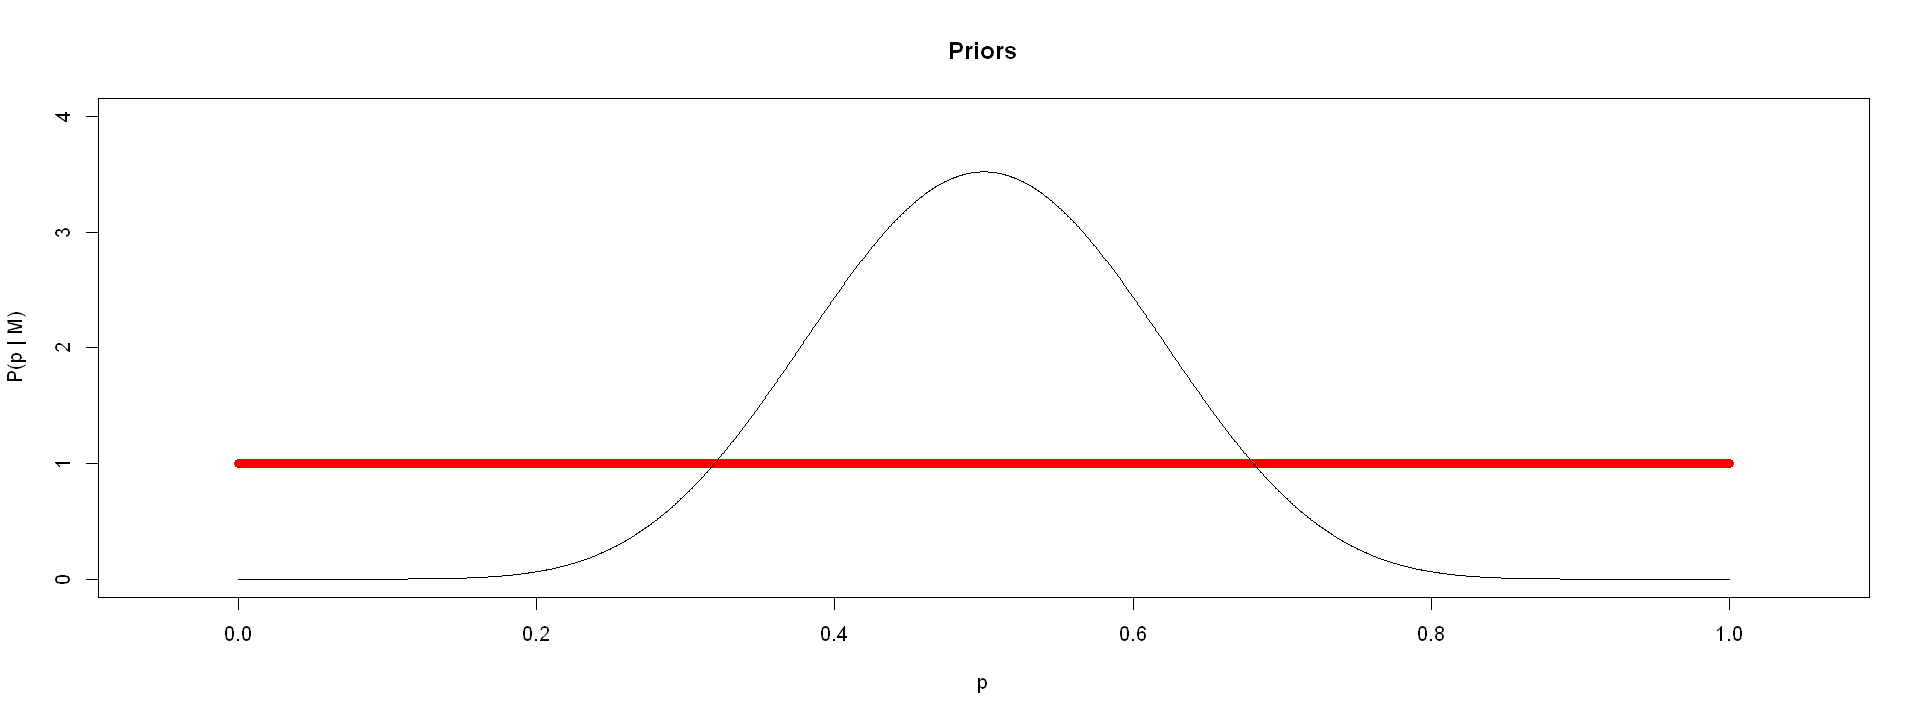

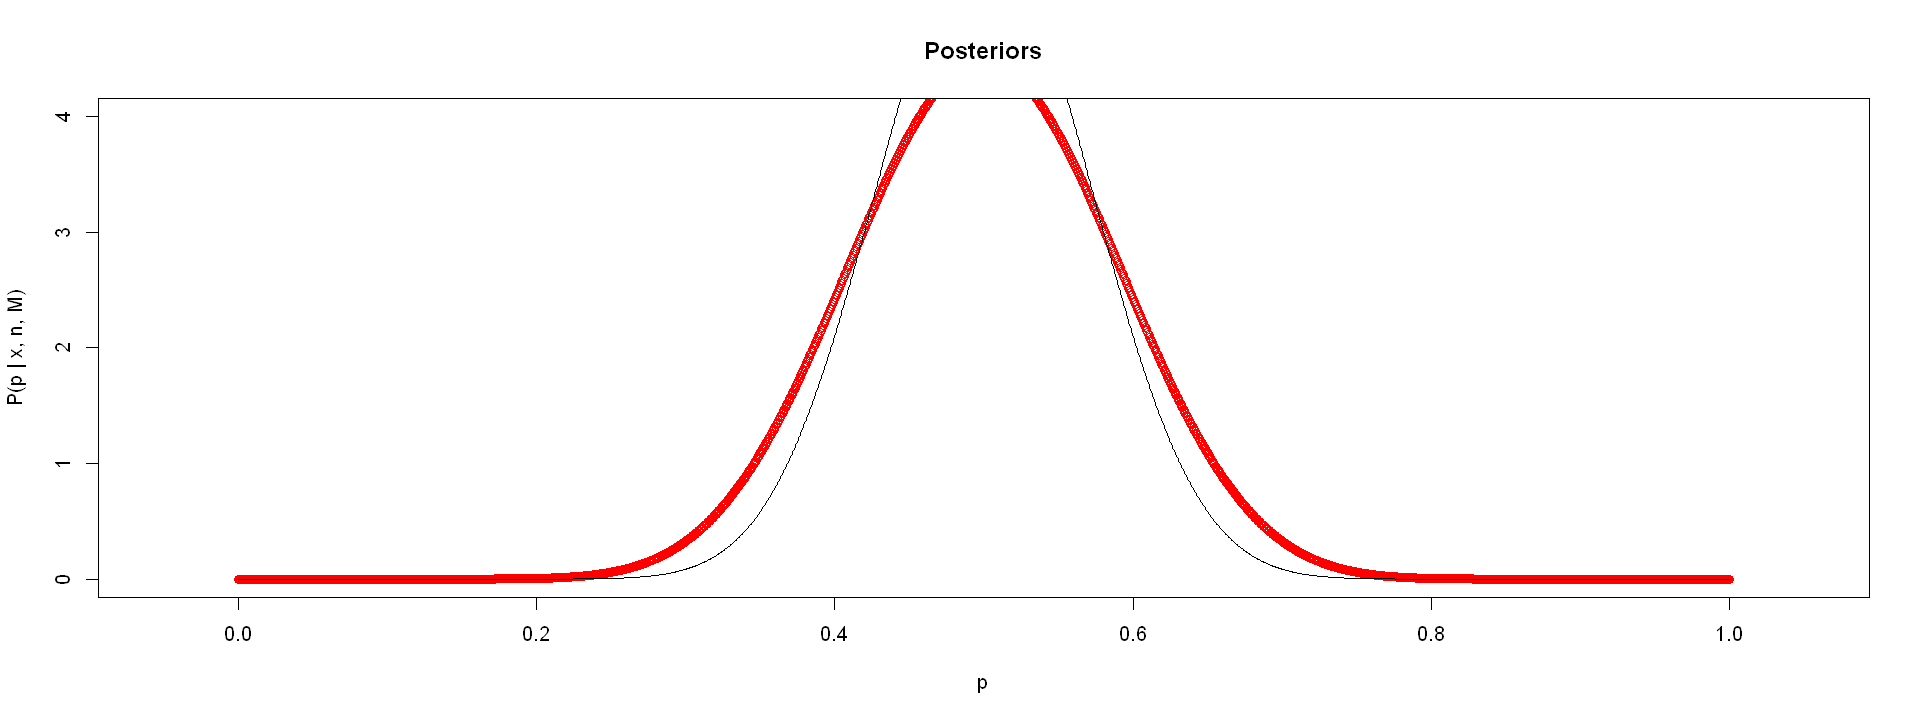

In [148]:
n <- 30
r <- 15
a_prior <- 10
b_prior  <- 10
n_samples <- 2000
delta.p <- 1/n_sample
p <- seq(from=1/(2*n_samples),by=1/n_samples, length.out=n_samples)
x <- seq(0, 30)
likelihood <- dbinom(x, n, 1/2)
prior_b <- dbeta(p, a_prior, b_prior)
prior_u <- dunif(p, 0, 1)
post_b <- dbeta(x=p, a_prior+r, b_prior+n-r)
u_p <- dbinom(x=r, size=n, prob=p)
post_u <- u_p/(delta.p*sum(u_p))
options(repr.plot.width=16, repr.plot.height=6)  

plot(x, likelihood, 
     col = 'black', main="Likelihood", 
     
     xlab="x", ylab="P(x | p, n, M)")
#------------------------
plot(p, prior_u, 
     col = 'red', main="Priors", 
     xlim=c(-0.05,1.05), ylim=c(0,4),
     xlab="p", ylab="P(p | M)")
lines(p, prior_b,
      col = 'black')
#------------------------
plot(p, post_u,
     col = 'red', main="Posteriors", 
     xlim=c(-0.05,1.05), ylim=c(0,4),
     xlab="p", ylab="P(p | x, n, M)")
lines(p, post_b, 
      col = 'black')

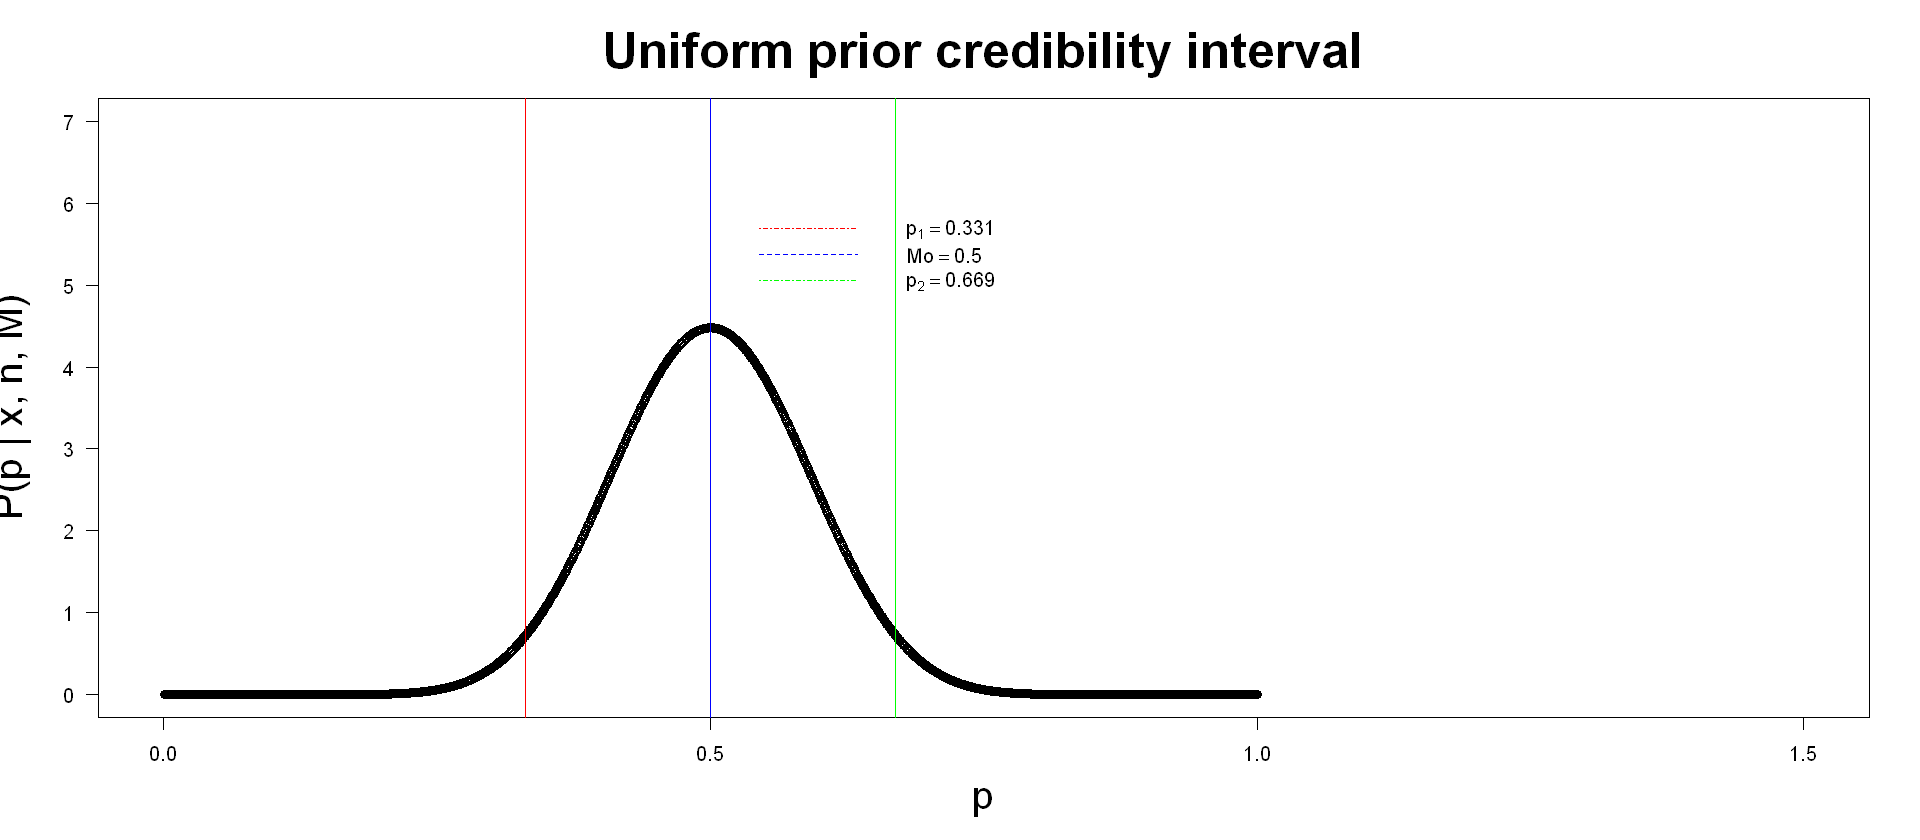

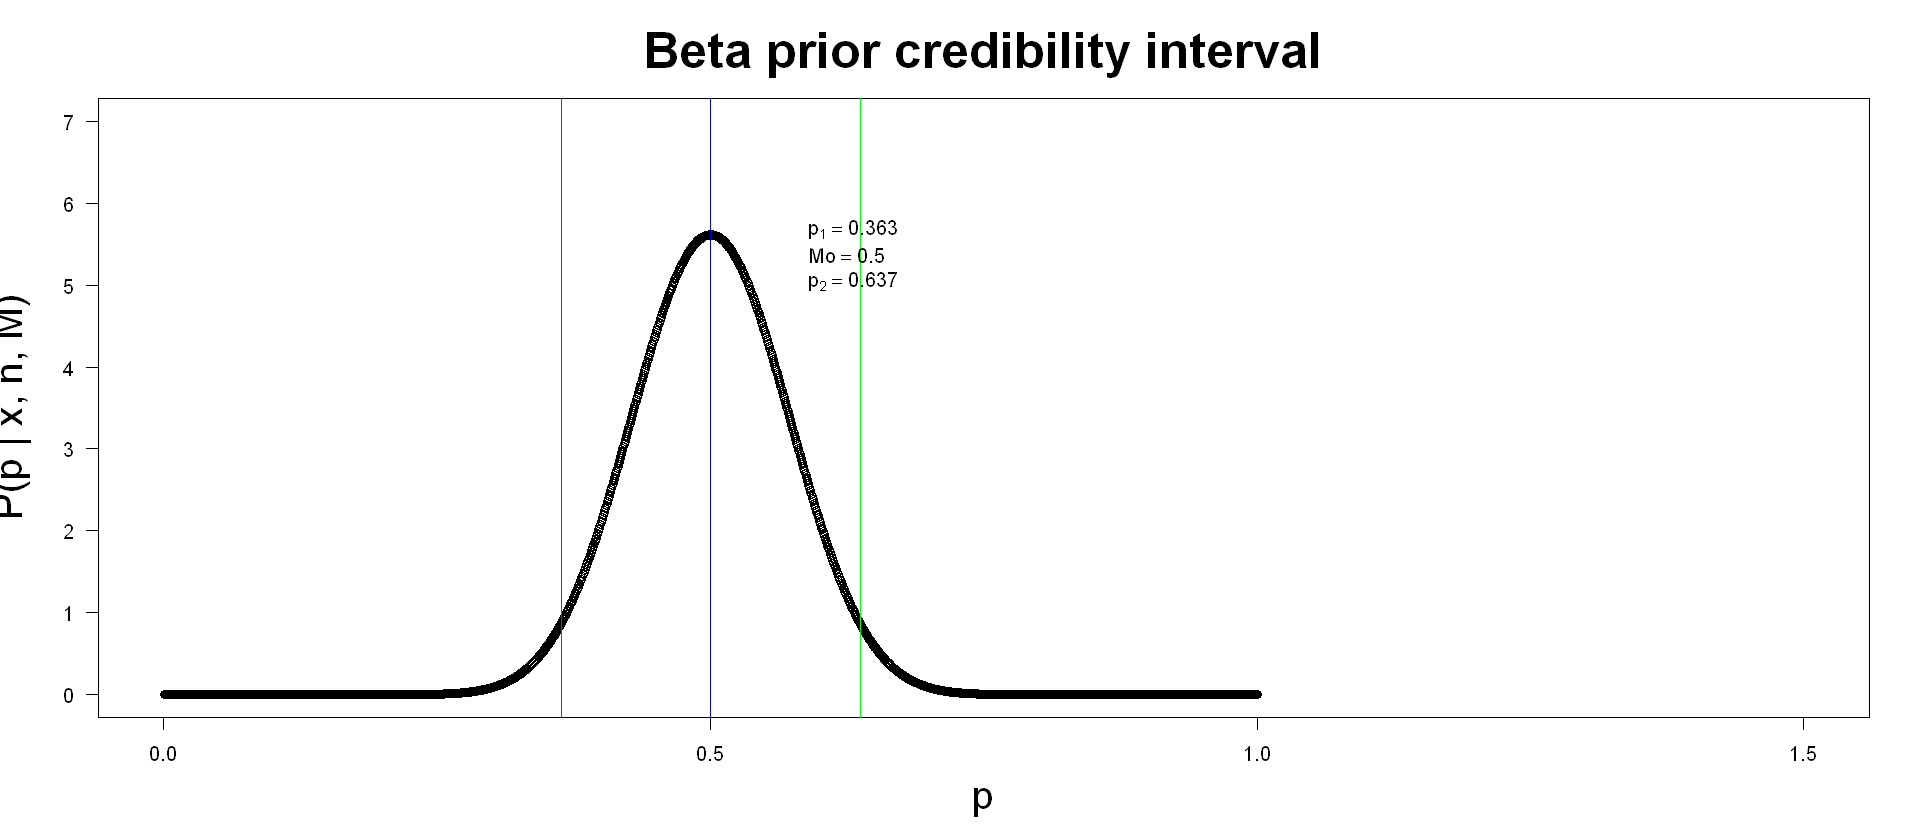

In [169]:
mode_b <- p[which.max(post_b)]
p1_b <- qbeta(0.025, a_prior+r, b_prior+n-r)
p2_b <- qbeta(0.975, a_prior+r, b_prior+n-r)
mode_u <- p[which.max(post_u)]
cs_u <- cumsum(post_u)/n.sample
p1_u <- p[cs_u>=0.025][1]
p2_u <- p[cs_u>=0.975][1]
options(repr.plot.width=16, repr.plot.height=7)  
 
plot(p, post_flat, 
     col = 'black', main="Uniform prior credibility interval", 
     cex.main=2.5, xlim=c(0,1.5), ylim=c(0,7),
     xlab="p", ylab="P(p | x, n, M)", cex.lab=2, las=1)
abline(v=mode_u, col='blue')
abline(v=p1_u, col='red')
abline(v=p2_u, col='green')
legend(0.5, 6, col=c("red", "blue", "green"), 
       lty=c(4, 2, 4), bty='n', 
       legend = c(parse(text = paste0('p[1]==', round(p1_u, 3))),
                  parse(text = paste0('Mo==', round(mode_u, 3))),
                  parse(text = paste0('p[2]==', round(p2_u, 3))))
         )
#--------------------------------------------------------------------
plot(p, post_beta, 
     col = 'black', main="Beta prior credibility interval", 
     cex.main=2.5, xlim=c(0,1.5), ylim=c(0,7),
     xlab="p", ylab="P(p | x, n, M)", cex.lab=2, las=1)
abline(v=mode_b, col='blue')
abline(v=p1_beta, col='red')
abline(v=p2_beta, col='green')
legend(0.5, 6, col=c("red", "blue", "green"), 
       lty=c(4, 2, 4),bty='n',      
       legend = c(parse(text = paste0('p[1]==', round(p1_beta, 3))),
                  parse(text = paste0('Mo==', round(mode_b, 3))),
                  parse(text = paste0('p[2]==', round(p2_beta, 3))))
         )

For the sequential analysis, a Uniform prior is assumed at the beginning ($Beta(\alpha=1, \beta=1)$), then, after each iteration, the estimated posterior becomes the prior of the next step.


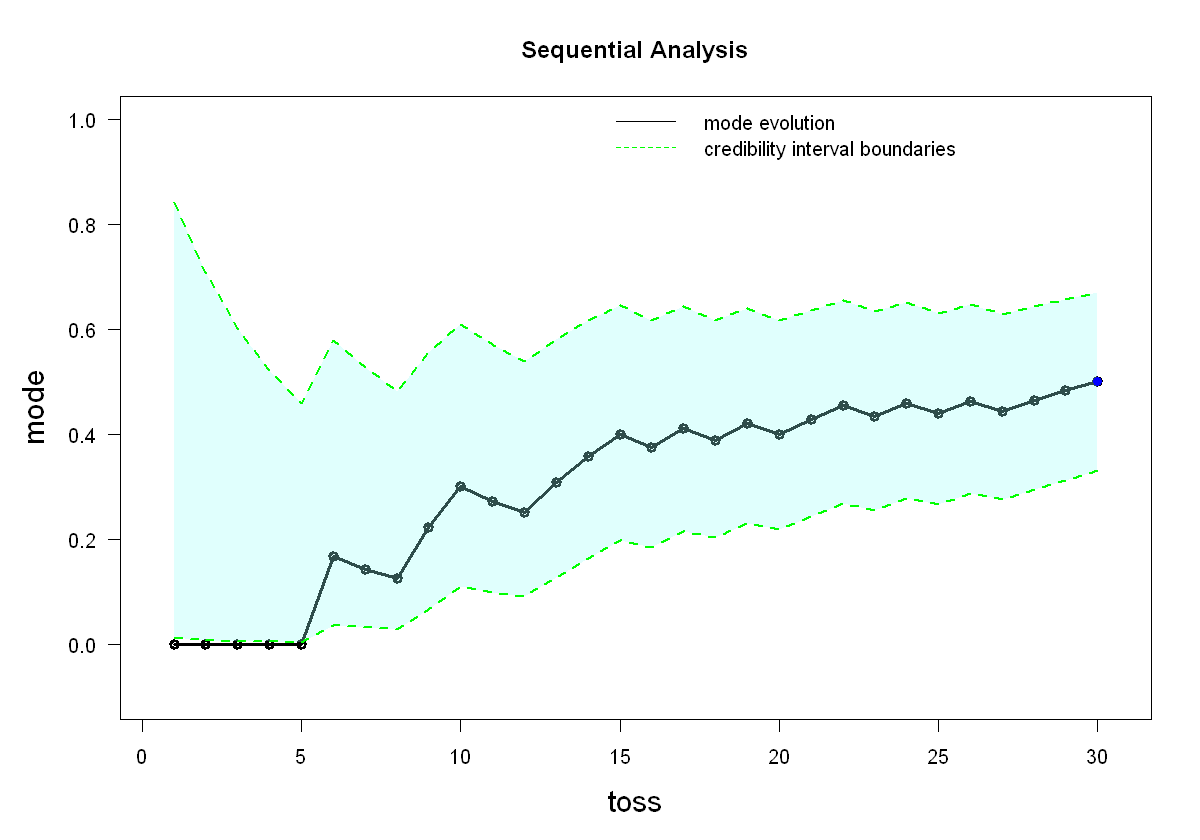

In [192]:
n_sample <- 2000
delta.p <- 1/n_sample
p <- seq(from=1/(2*n_sample),by=1/n_sample, length.out=n_sample)
r <- 0    #initial number of successes
prior <- dbeta(p, 1, 1) #start with uniform prior
mode <- c(1:30)
p1 <- c(1:30)
p2 <- c(1:30)
#H=1 and T=0
tosses <- c(0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1)
for(toss in 1:30){
    r <- tosses[toss]
    l <- dbinom(r, 1, p) #likelihood
    supp <- l*prior
    posterior <- supp/(delta.p*sum(supp))
    mode[toss] <- p[which.max(posterior)]
    cumulative <- cumsum(posterior)/n_sample
    p1[toss] <- p[cumulative>=0.025][1]
    p2[toss] <- p[cumulative>=0.975][1]
    prior <- posterior
}

options(repr.plot.width=10, repr.plot.height=7)  
par(mar=c(5, 5, 4, 2))            
plot(1:30, mode, type='o', lwd = 3, 
     col = 'black', main="Sequential Analysis", 
      xlim=c(0.5,30.5), ylim=c(-0.1,1),
     xlab="toss", ylab="mode", cex.lab=1.5, las=1)
polygon(c(1:30, 30:1), c(p1, rev(p2)),col = rgb(0.596, 1, 0.98, alpha=0.3), border = NA)
lines(1:30, p1, lty='dashed', lwd = 2, col='green')
lines(1:30, p2, lty='dashed', lwd = 2, col='green')
points(30, mode[30], pch=19, col='blue',)
legend('topright', col=c("black", "green"), 
       lty=c('solid', 'dashed'),
       bty='n',
       legend = c("mode evolution",
                  "credibility interval boundaries")
         )

In [193]:
cat("Mode = ", mode_beta)
cat("Beta prior, one-step analysis", '\n')
cat("95%credibility interval =", p1_beta, "&", p2_beta, '\n')
cat("Uniform prior, one-step analysis", '\n')
cat("\n95%credibility interval =", p1_flat, "&", p2_flat, '\n')
cat("Sequential analysis", '\n')
cat("\n95%credibility interval =", p1[30], "&", p2[30])

Mode =  0.49975Beta prior, one-step analysis 
95%credibility interval = 0.3633783 & 0.6366217 
Uniform prior, one-step analysis 

95%credibility interval = 0.33075 & 0.66925 
Sequential analysis 

95%credibility interval = 0.33075 & 0.66925

With the knowledge increase in the sequential analysis, the credibility interval shrinks and the mode approach its true value $0.5$, the final result behaves as expected.